In [1]:
!pip install missingno

# Proyecto 2 Data Mining y Machine Learning
Prof. Iván Carrera
Estudiante. Jorge Ricardo Teran Sosa
30 de julio de 2023

El presente proyecto tiene como objetivo predecir la contaminación del aire en Beijing, China, utilizando el conjunto de datos "Beijing Multi-Site Air-Quality Data Data Set", disponible en este [link](http://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data)

Hace unos años, China estableció el Índice de Calidad del Aire (AQI) basado en el nivel de cinco contaminantes atmosféricos, a saber, dióxido de azufre (SO2), dióxido de nitrógeno (NO2), partículas suspendidas (PM10), monóxido de carbono (CO) y ozono (O3) medidos en las estaciones de monitoreo de cada ciudad. A cada nivel de contaminante se le asigna una puntuación individual, y el AQI final es la puntuación más alta de esos cinco contaminantes. Los contaminantes pueden medirse de manera bastante diferente. SO2, NO2 y PM10 se miden como un promedio diario. CO y O3 son más dañinos y se miden como un promedio por hora. El valor final del AQI se calcula por día y tiene la interpretación que se muestra en la siguiente tabla.

|  **AQI**  | **Air Pollution Level** |
|:---------:|:-----------------------:|
|   0 - 50  |        Excellent        |
|  51 - 100 |           Good          |
| 101 - 150 |    Slightly Polluted    |
| 151 - 200 |     Lightly Polluted    |
| 201 - 250 |   Moderately Polluted   |
| 251 - 300 |     Heavily Polluted    |
|    300+   |    Severely Polluted    |

## Importación de datos, limpieza y preprocesamiento

In [2]:
import pandas as pd
import glob
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
# Revisamos si tenemos valores nulos
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34139.0,82.773611,82.135694,3.0000,22.00,58.0,114.00,898.0
PM10,34346.0,110.060391,95.223005,2.0000,38.00,87.0,155.00,984.0
SO2,34129.0,17.375901,22.823017,0.2856,3.00,9.0,21.00,341.0
NO2,34041.0,59.305833,37.116200,2.0000,30.00,53.0,82.00,290.0
CO,33288.0,1262.945145,1221.436236,100.0000,500.00,900.0,1500.00,10000.0


<AxesSubplot:>

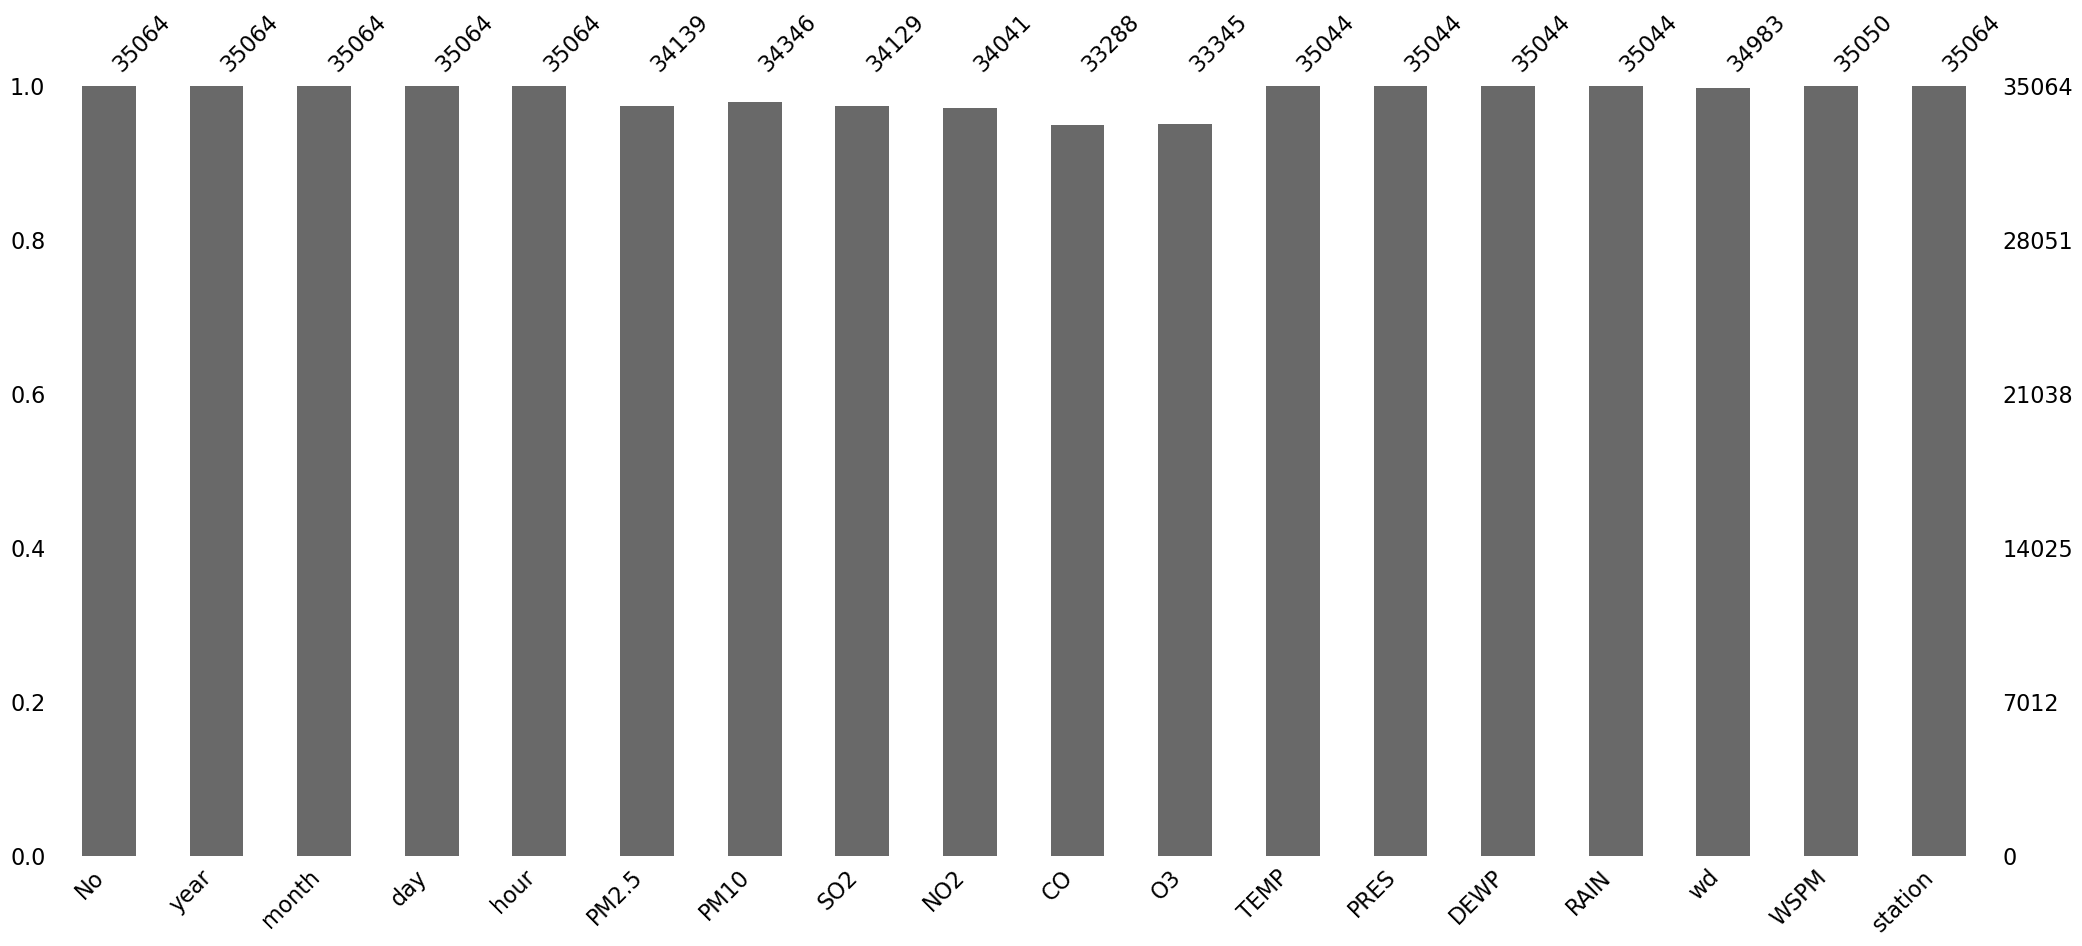

In [7]:
msno.bar(df)

Notamos que existen valores nulos, para los cuales tendremos que hacer imputación de datos alrrededor de la media.

<AxesSubplot:>

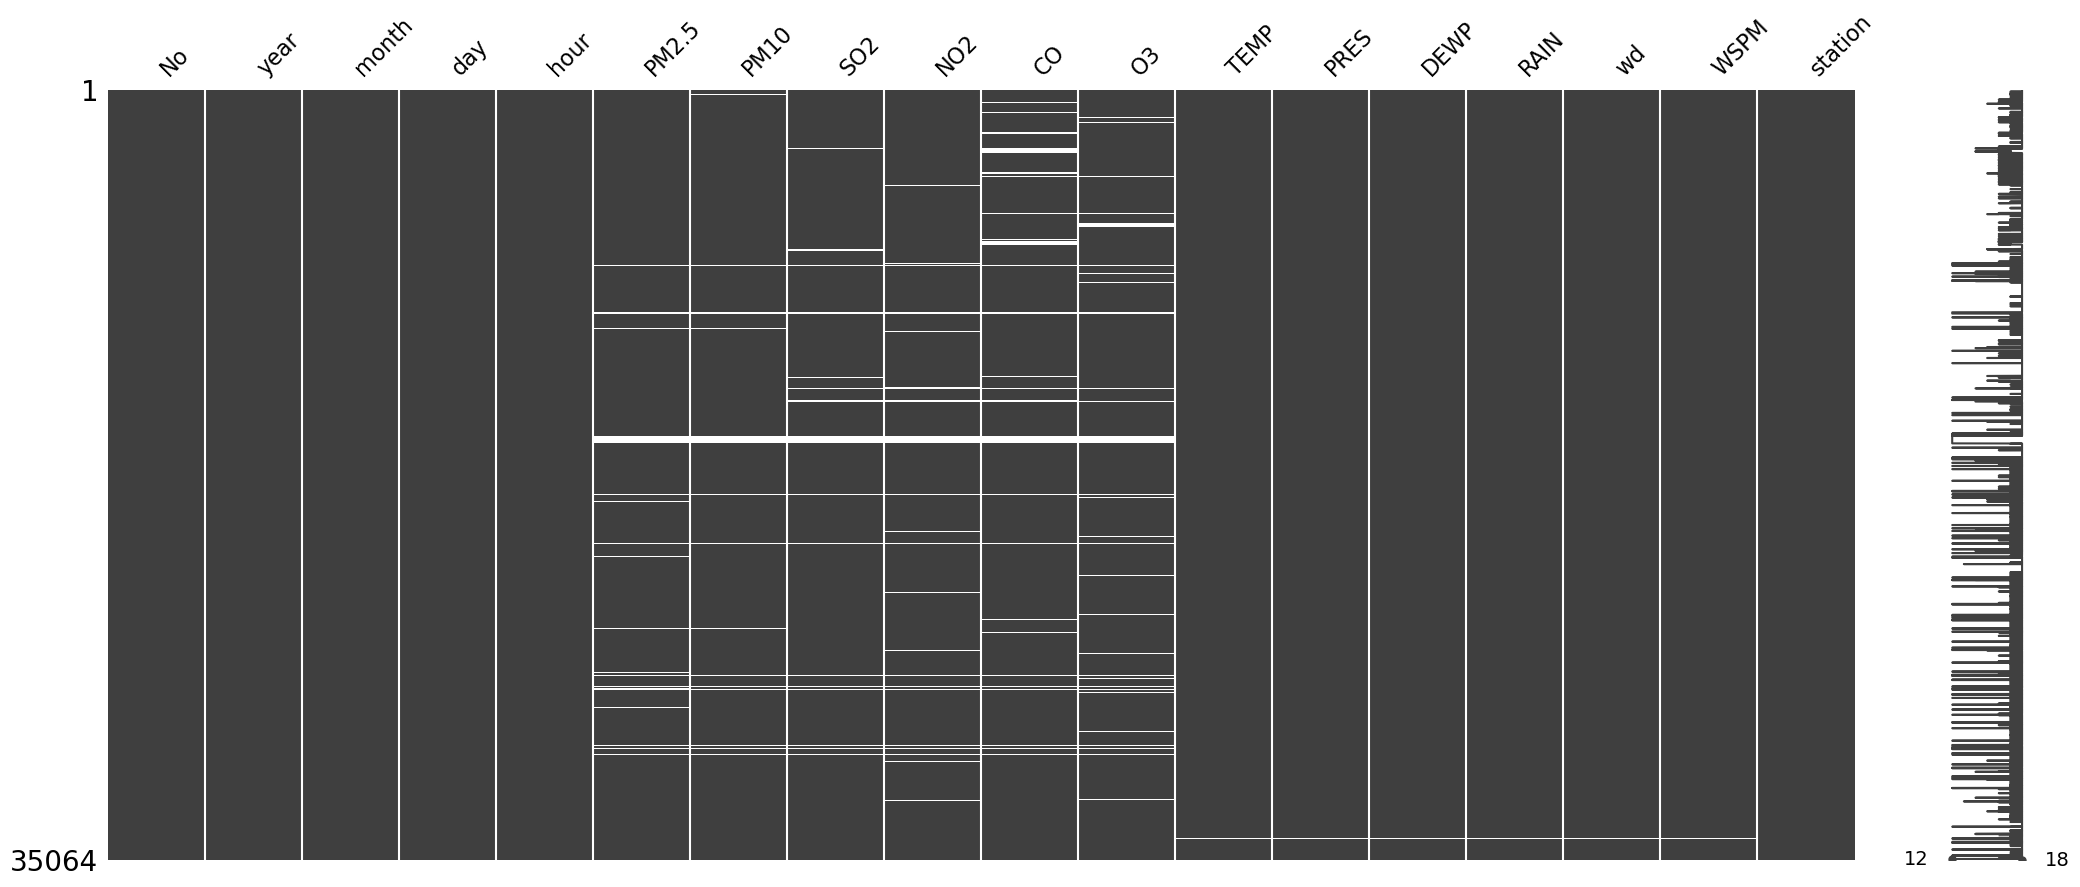

In [8]:
msno.matrix(df)

Los datos que con mas nulos son los de la columna CO y esta perdida es de forma aleatoria, sin embargo hay columnas que siguen un patron con respecto a la perdida podriamos pensar que se trata de una falta de datos justo en esa fila.
Para completar estos valores nulos, no ayudaremos de una tecnica de imputacion de datos que consiste llenar estos valores con la media de valores que existen en la columna.
Esto lo haremos utilizando la libreria SimpleImputer, que se encarga de tomar la media de valores y completar los nulos.

In [9]:
imputer = SimpleImputer()
df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
df['PM10'] = imputer.fit_transform(df[['PM10']])
df['SO2'] = imputer.fit_transform(df[['SO2']])
df['NO2'] = imputer.fit_transform(df[['NO2']])
df['CO'] = imputer.fit_transform(df[['CO']])
df['O3'] = imputer.fit_transform(df[['O3']])

<AxesSubplot:>

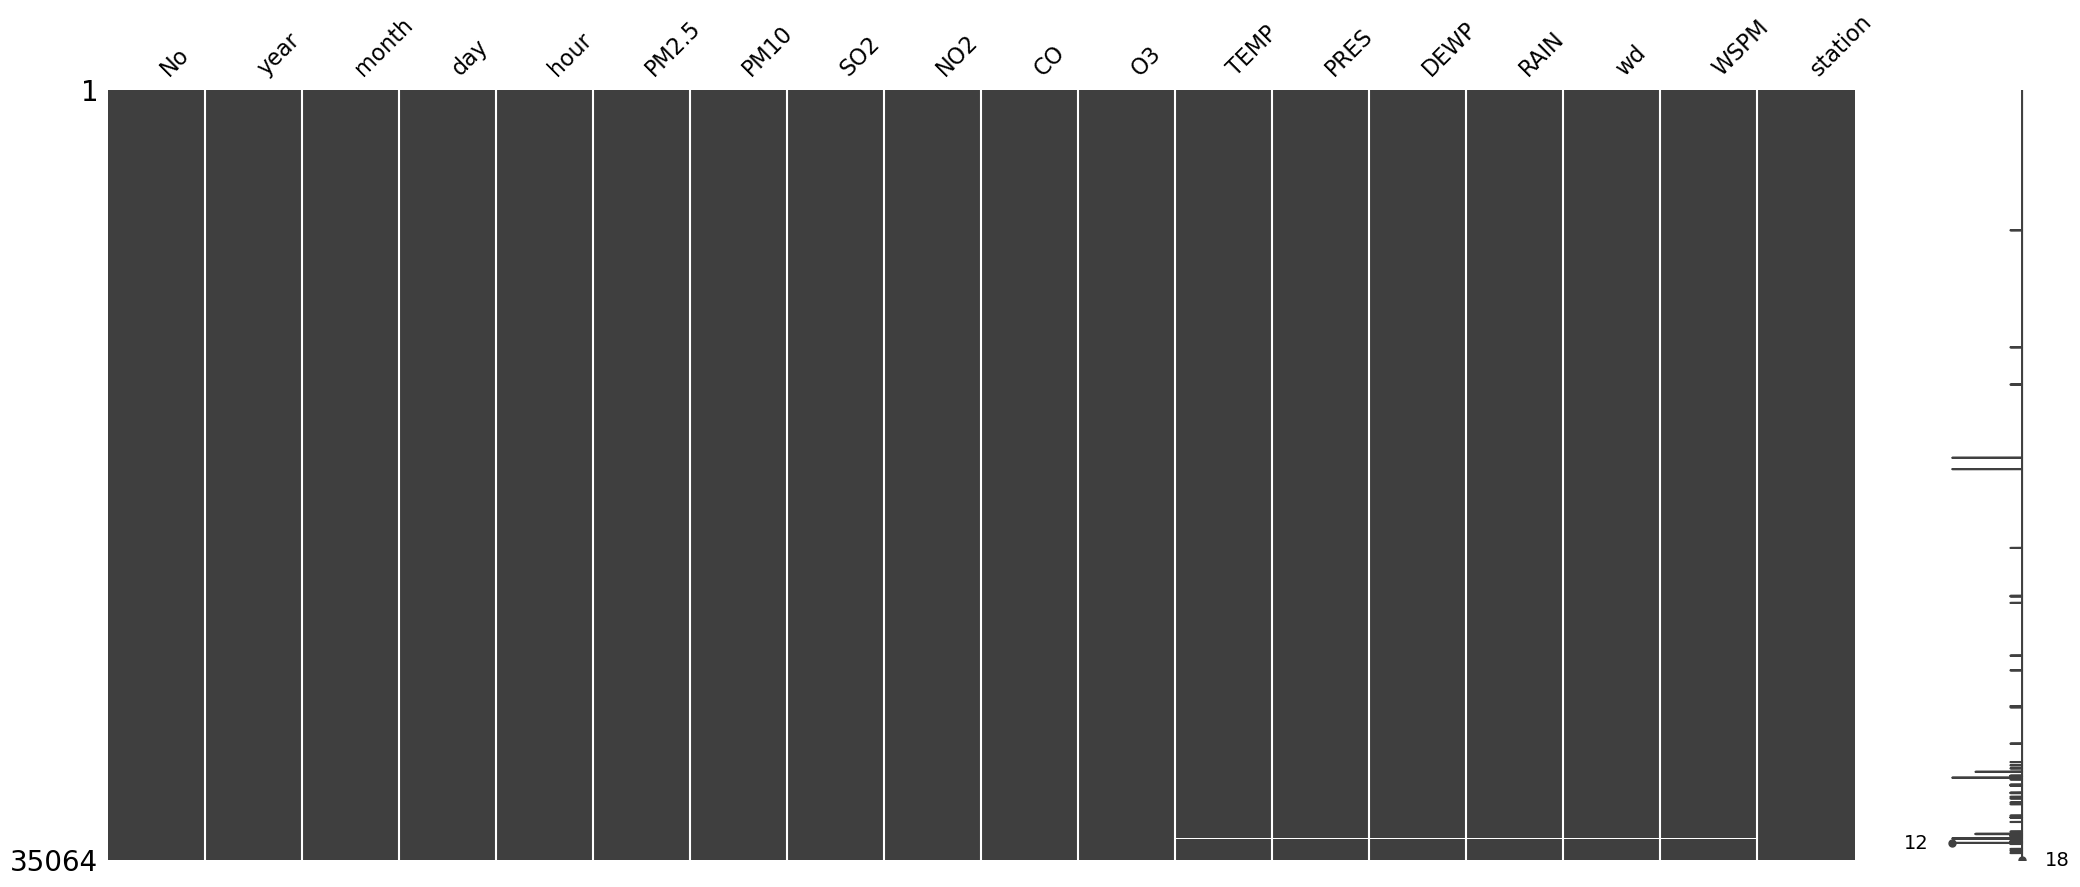

In [10]:
msno.matrix(df)

Como podemos observar los valores se han llenado correctamente y ya no tenemos más valores nulos, sin embargo podemos ver una pequeña linea en los ultimos valores de nuestro dataframe, para esto no haremos uso de la tecnica de imputacion dado que estos ultimos valores no los usaremos para entrenar nuestro modelo. Para lo cula quitaremos de nuestro dataframe y crearemos uno nuevo que sirva exclusivamente para el entrenamiento.

### Columnas de interes
Vamos a empezar a quitar las columnas que no influyen en nuestro modelo, tales como No, TEMP, PRES, DEWP, RAIN, wd, WSPM, station. Puesto que la entrada para nuestro modelo será una fecha la cual el modelo interpretará y nos dará la predeccion de cuanto es el AQI en esa fecha.

In [11]:
df = df.drop(['No', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'], axis=1)
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0
...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,35064.0,82.773611,81.045038,3.0000,23.00,61.0,112.00,898.0
PM10,35064.0,110.060391,94.243001,2.0000,39.00,89.0,153.00,984.0
SO2,35064.0,17.375901,22.516658,0.2856,3.00,9.0,21.00,341.0
NO2,35064.0,59.305833,36.570739,2.0000,31.00,55.0,81.00,290.0
CO,35064.0,1262.945145,1190.100376,100.0000,500.00,900.0,1500.00,10000.0
O3,35064.0,56.353358,56.478782,0.2142,9.00,46.0,80.00,423.0


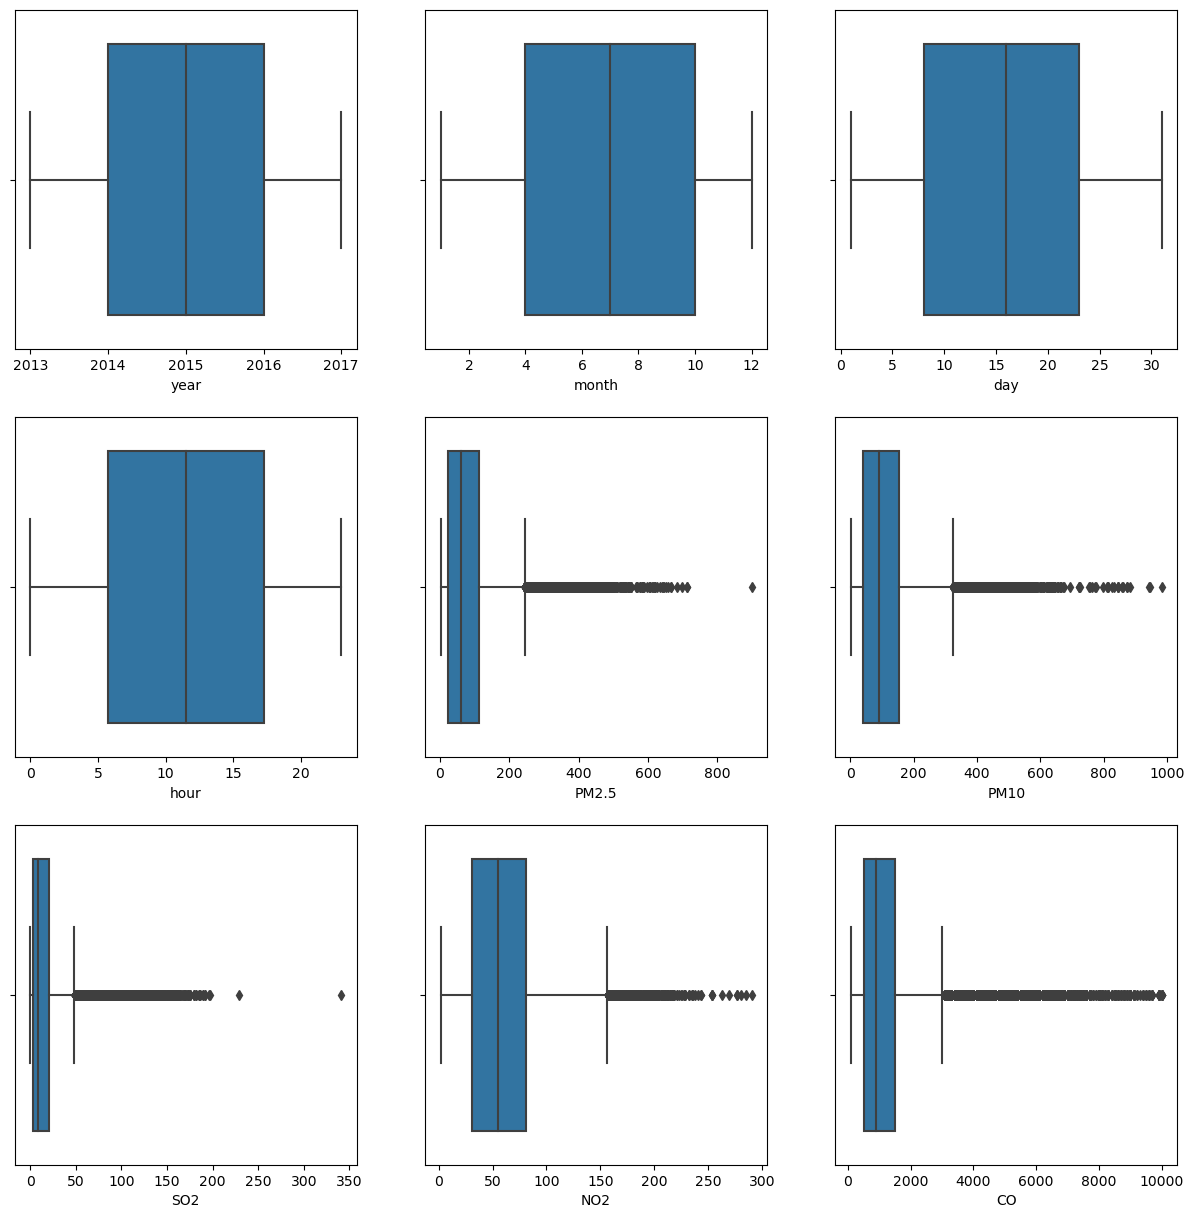

In [13]:
plt.figure(figsize=(15, 15))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1], data=df)

In [14]:
q1 = df['SO2'].quantile(0.05)
q2 = df['SO2'].quantile(0.95)
df.loc[df['SO2'] <= q1, 'SO2'] = q1
df.loc[df['SO2'] >= q2, 'SO2'] = q2

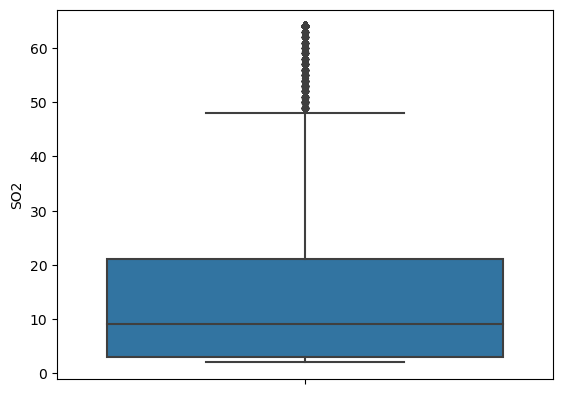

In [15]:
data = df['SO2']
sns.boxplot(y=data, orient='y')
plt.show()

Tenemos las columnas como SO2 con varios valores atipicos, los cuales pudimos ajustar un poco.

In [17]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0
...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0


## Calculo del AQI
Para el calculo del AQI tomaremos los valores de 5 contaminantes los cuales son: SO2, NO2, PM10, CO, O3 todos estos tienen una puntuación individual, el AQI al final es la puntuacíon más alta de estos cinco contaminantes. Para los contaminantes SO2, NO2, y PM10 se miden como un promedio diario, mientras que CO y O3 son más dañinos se miden como un promedio por hora. Dado que nuestra tabla está dada en terminos de horas estos ultimos contaminantes no serán un problema, para lo cual haremos un promedio por dia de todos los contaminantes así nos desaremos de la tabla horas y tendremos el promedio por dia, para despues tomar el más alto de estos el cual será el valor del AQI.

In [18]:
# Creamos una nueva columna en la que ponemos la fecha
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Agrupamos los datos por dia
df = df.groupby(pd.Grouper(key='Date', freq='D')).mean()

df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
Date,,,,,,,,,,
2013-03-01,2013.0,3.0,1.0,11.5,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000
2013-03-02,2013.0,3.0,2.0,11.5,30.750000,42.083333,34.500000,66.666667,824.916667,29.750000
2013-03-03,2013.0,3.0,3.0,11.5,76.916667,120.541667,47.125000,81.000000,1620.625000,19.125000
2013-03-04,2013.0,3.0,4.0,11.5,22.708333,44.583333,22.640663,47.471076,644.289381,53.750000
2013-03-05,2013.0,3.0,5.0,11.5,148.875000,183.791667,63.750000,132.833333,2357.958333,68.458333
...,...,...,...,...,...,...,...,...,...,...
2017-02-24,2017.0,2.0,24.0,11.5,21.541667,32.625000,16.583333,58.875000,575.000000,50.791667
2017-02-25,2017.0,2.0,25.0,11.5,11.208333,19.708333,6.750000,43.375000,420.833333,65.875000
2017-02-26,2017.0,2.0,26.0,11.5,28.125000,40.708333,10.083333,65.375000,720.833333,48.625000


<AxesSubplot:>

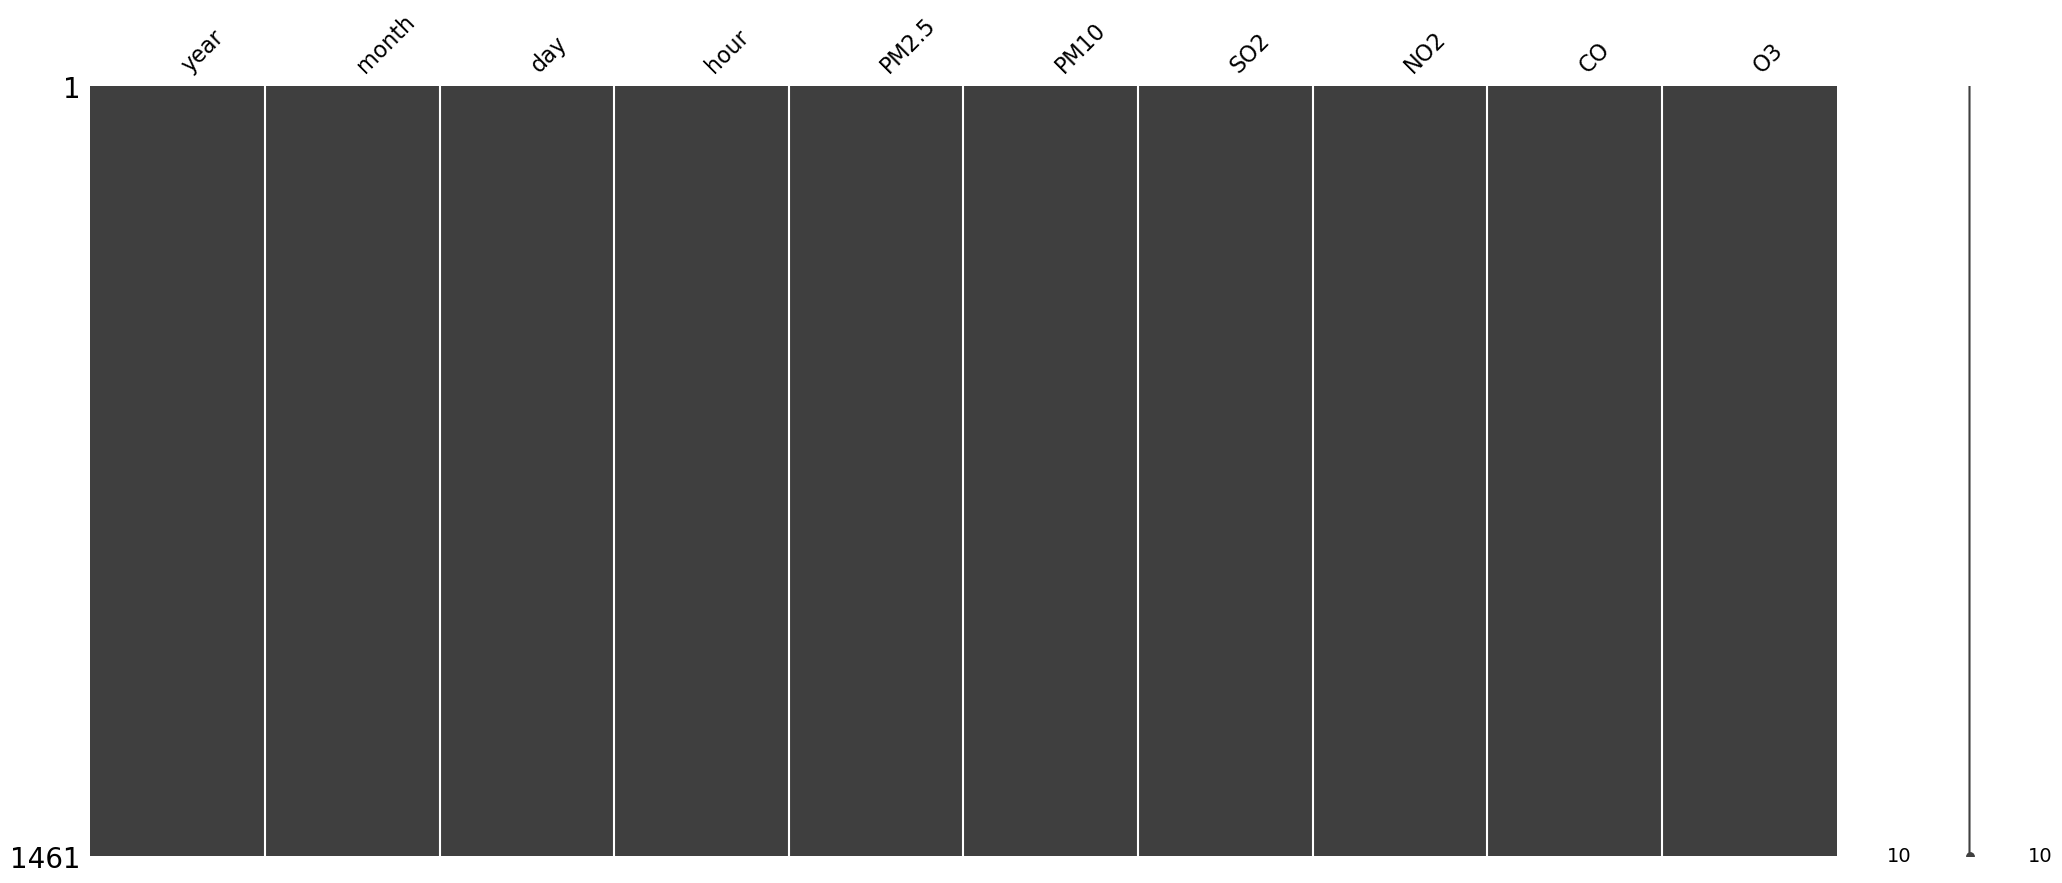

In [19]:
msno.matrix(df)

Ahora tenemos los promedios diarios de todos los contaminantes, solo falta calcular el AQI siendo este el valor más alto de todos.

In [20]:
df = df.drop(['year', 'month', 'day', 'hour'], axis=1)

In [21]:
df['AQI'] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)
df

,PM2.5,PM10,SO2,NO2,CO,O3,AQI
Date,,,,,,,
2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,429.166667
2013-03-02,30.750000,42.083333,34.500000,66.666667,824.916667,29.750000,824.916667
2013-03-03,76.916667,120.541667,47.125000,81.000000,1620.625000,19.125000,1620.625000
2013-03-04,22.708333,44.583333,22.640663,47.471076,644.289381,53.750000,644.289381
2013-03-05,148.875000,183.791667,63.750000,132.833333,2357.958333,68.458333,2357.958333
...,...,...,...,...,...,...,...
2017-02-24,21.541667,32.625000,16.583333,58.875000,575.000000,50.791667,575.000000
2017-02-25,11.208333,19.708333,6.750000,43.375000,420.833333,65.875000,420.833333
2017-02-26,28.125000,40.708333,10.083333,65.375000,720.833333,48.625000,720.833333


<AxesSubplot:>

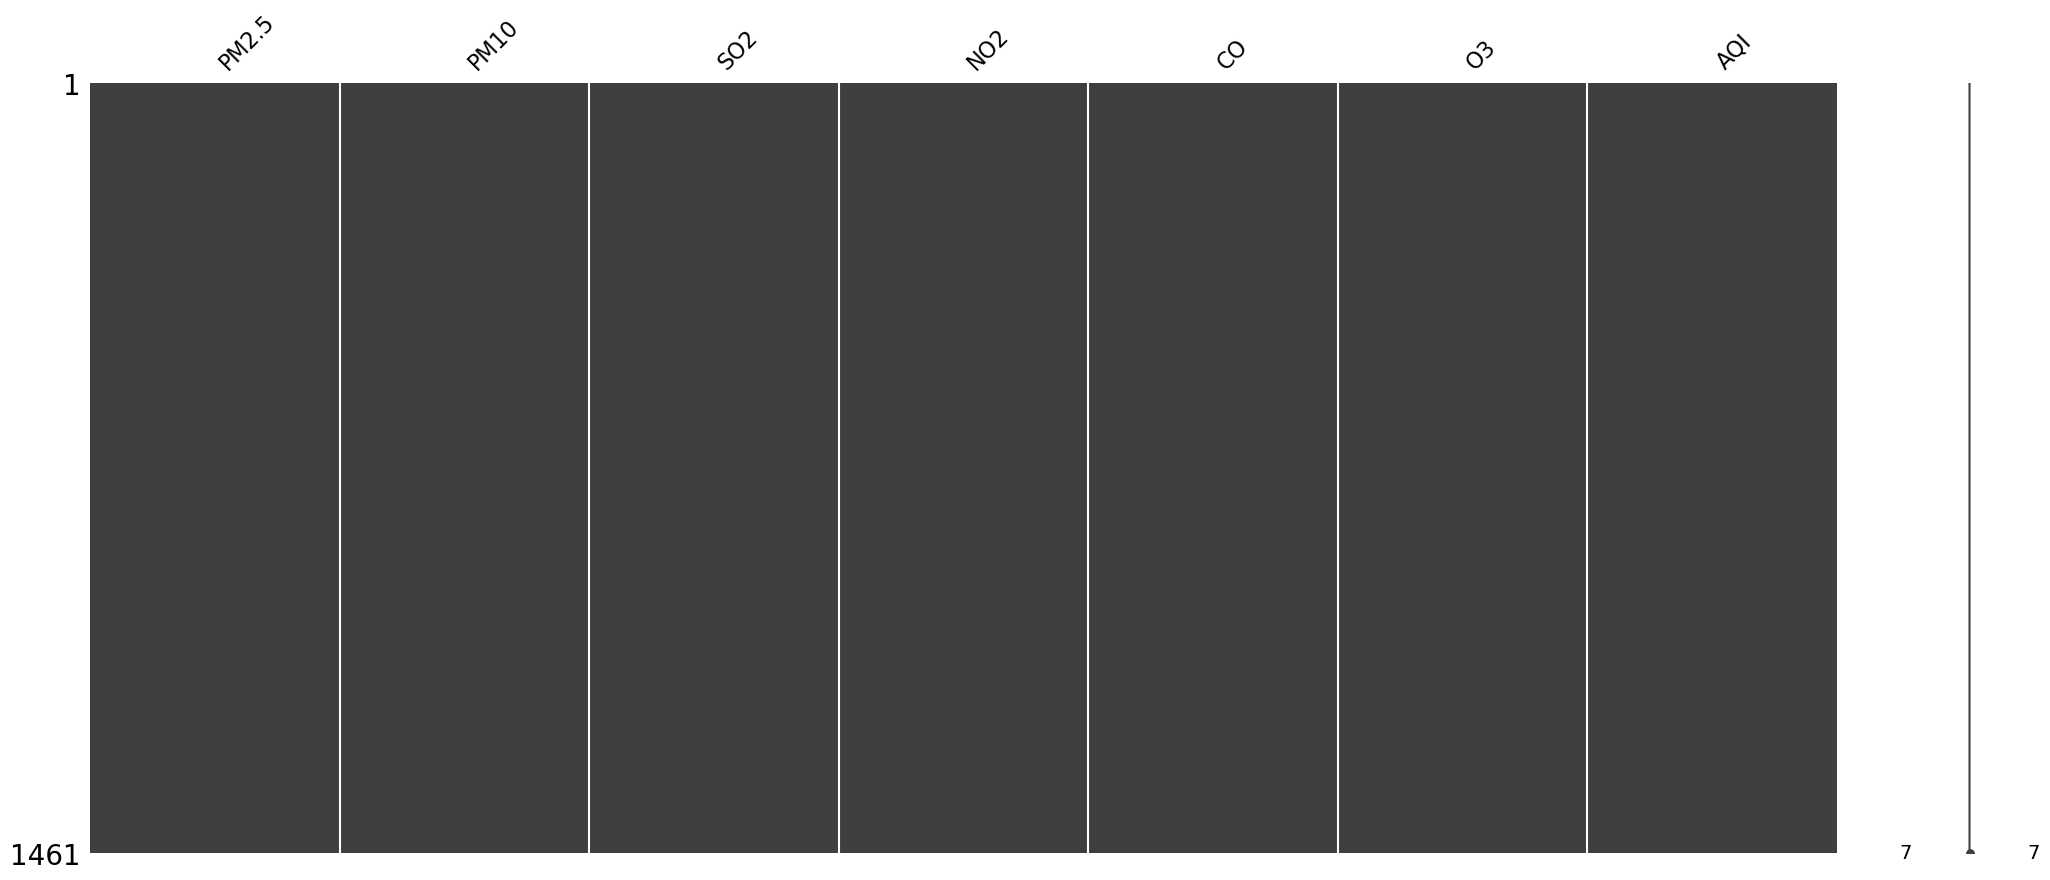

In [22]:
msno.matrix(df)

In [23]:
rangos = [ 0, 50, 100, 150, 200, 250, 300, float('inf')]
etiquetas = [ 'Excellent', 'Good', 'Slightly Polluted', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted', 'Severely Polluted']
df['Air Pollution Level'] = pd.cut(df['AQI'], bins=rangos, labels=etiquetas)
df

,PM2.5,PM10,SO2,NO2,CO,O3,AQI,Air Pollution Level
Date,,,,,,,,
2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,429.166667,Severely Polluted
2013-03-02,30.750000,42.083333,34.500000,66.666667,824.916667,29.750000,824.916667,Severely Polluted
2013-03-03,76.916667,120.541667,47.125000,81.000000,1620.625000,19.125000,1620.625000,Severely Polluted
2013-03-04,22.708333,44.583333,22.640663,47.471076,644.289381,53.750000,644.289381,Severely Polluted
2013-03-05,148.875000,183.791667,63.750000,132.833333,2357.958333,68.458333,2357.958333,Severely Polluted
...,...,...,...,...,...,...,...,...
2017-02-24,21.541667,32.625000,16.583333,58.875000,575.000000,50.791667,575.000000,Severely Polluted
2017-02-25,11.208333,19.708333,6.750000,43.375000,420.833333,65.875000,420.833333,Severely Polluted
2017-02-26,28.125000,40.708333,10.083333,65.375000,720.833333,48.625000,720.833333,Severely Polluted


In [24]:
df.isnull().sum()

PM2.5                  0
PM10                   0
SO2                    0
NO2                    0
CO                     0
O3                     0
AQI                    0
Air Pollution Level    0
dtype: int64

In [25]:
df.head(60)

,PM2.5,PM10,SO2,NO2,CO,O3,AQI,Air Pollution Level
Date,,,,,,,,
2013-03-01,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,429.166667,Severely Polluted
2013-03-02,30.750000,42.083333,34.500000,66.666667,824.916667,29.750000,824.916667,Severely Polluted
2013-03-03,76.916667,120.541667,47.125000,81.000000,1620.625000,19.125000,1620.625000,Severely Polluted
2013-03-04,22.708333,44.583333,22.640663,47.471076,644.289381,53.750000,644.289381,Severely Polluted
2013-03-05,148.875000,183.791667,63.750000,132.833333,2357.958333,68.458333,2357.958333,Severely Polluted
2013-03-06,223.250000,265.166667,64.000000,142.059383,3031.456048,19.750000,3031.456048,Severely Polluted
2013-03-07,263.375000,316.083333,61.166667,147.750000,3632.875000,38.833333,3632.875000,Severely Polluted
2013-03-08,221.458333,297.958333,52.973996,116.355531,2471.578762,79.333333,2471.578762,Severely Polluted
2013-03-09,62.041667,206.877516,28.833333,45.000000,1178.958333,73.916667,1178.958333,Severely Polluted


# Análisis exploratorio de datos